# Import Library and Load Dataset

## Import Library

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [ ]:
#Load Dataset
df = pd.read_csv('Clicked Ads Dataset.csv', index_col = [0])
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [ ]:
# check info data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 85.9+ KB


# Exploratory Data Analysis

## Descriptive Statistics

In [ ]:
# check descriptive statistics for numerical feature
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [ ]:
# check descriptive statistics for categorical feature
df.describe(include = object).T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


In [ ]:
# data types per feature
nums = df.select_dtypes(['int64', 'float64']).columns
cats = df.select_dtypes(['object']).columns

In [ ]:
# display value counts for categorical features
for i in cats:
  print(f'value counts {i} column')
  print(df[i].value_counts())
  print()

value counts Male column
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64

value counts Timestamp column
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64

value counts Clicked on Ad column
No     500
Yes    500
Name: Clicked on Ad, dtype: int64

value counts city column
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru     

## Univariate Analysis

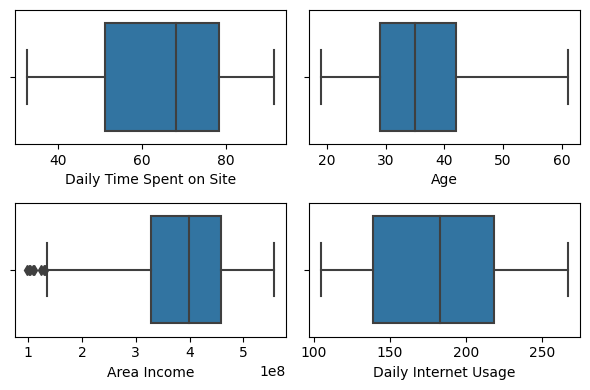

In [ ]:
# univariate analysis: boxplot
plt.figure(figsize = (6,4))
for i in range(len(nums)):
  plt.subplot(2,2, i + 1)
  sns.boxplot(x = df[nums[i]], orient = 'h')
  plt.tight_layout()

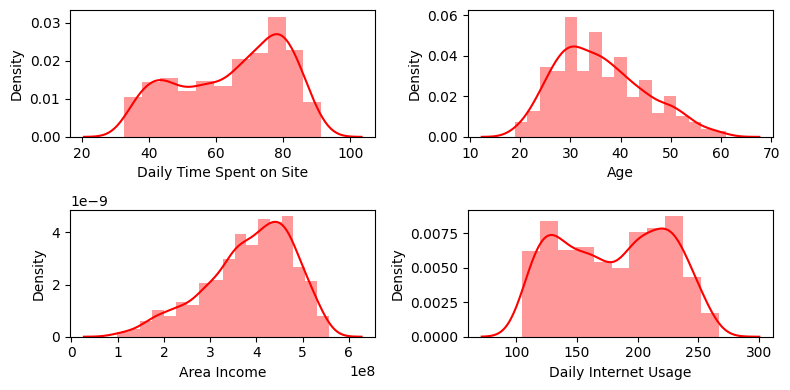

In [ ]:
# univariate analysis : distribution plot
plt.figure(figsize = (8,4))
for i in range(len(nums)):
  plt.subplot(2, 2, i + 1)
  sns.distplot(df[nums[i]], color = 'red')
  plt.tight_layout()

**Penjelasan**
- Pada boxplot, fitur numerikal Daily Time Spent on Site, Age, dan Daily Internet Usage tidak memiliki outlier, sedangkan fitur Area Income terdapat outlier.
- Fitur Daily Time Spent on Site dan Daily Internet Usage memiliki distribusi yang mendekati distribusi normal.
- Fitur Area Income memiliki distribusi negative skewed atau skew kiri, artinya kebanyakan customer berpendapatan rendah dibandingkan berpendapatan tinggi.
- Fitur Age memiliki distribusi positive skewed atau skew kanan, artinya kebanyakan customer memiliki umur lebih dari 30 tahun dibandingkan customer yang memiliki umur kurang dari itu.

## Bivariate Analysis

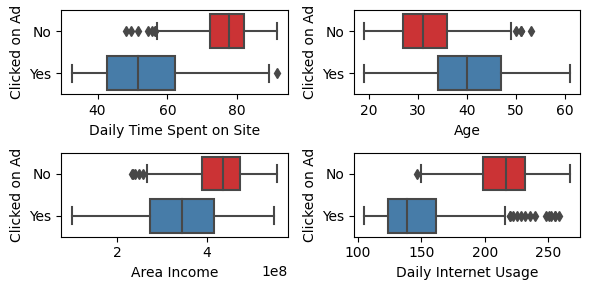

In [ ]:
# bivariate analysis: boxplot
plt.figure(figsize = (6,3))
for i in range(len(nums)):
  plt.subplot(2, 2, i + 1)
  sns.boxplot(x = df[nums[i]], y = df['Clicked on Ad'], palette = 'Set1')
  plt.tight_layout()

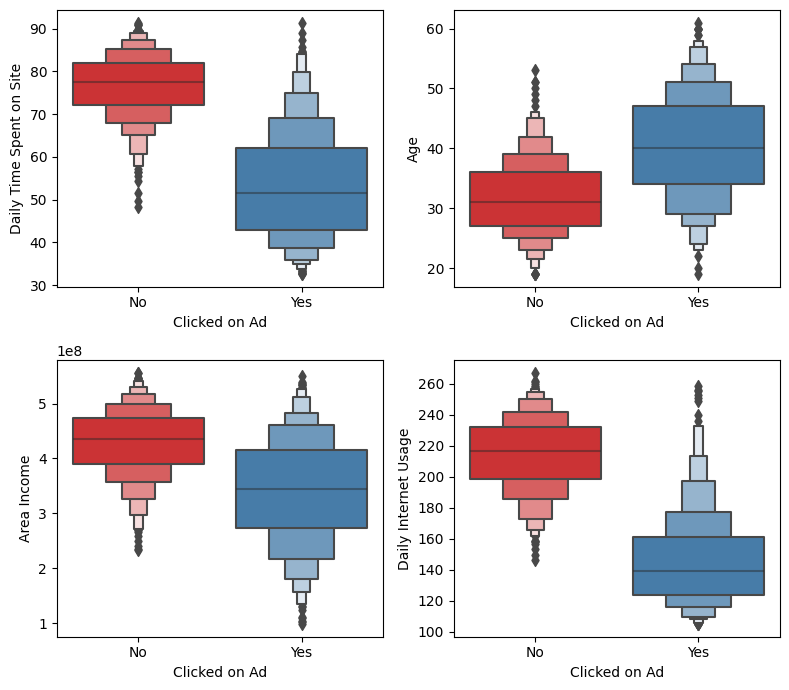

In [ ]:
# bivariate analysis: boxenplot
plt.figure(figsize = (8,7))
for i in range(len(nums)):
  plt.subplot(2, 2, i + 1)
  sns.boxenplot(y = df[nums[i]], x = df['Clicked on Ad'], palette = 'Set1')
  plt.tight_layout()

**Penjelasan**
- Semakin banyak waktu yang dihabiskan untuk mengunjungi suatu website, maka customer cenderung tidak mengklik ads. Begitu pun sebaliknya, semakin sedikit waktu yang dihabiskan untuk mengunjungi suatu website, maka customer cenderung mengklik ads.
- Customer yang mengklik ads rata-rata berumur 40 tahun dan tidak mengklik ads rata-rata berumur 30 tahun.
- Pengguna aktif memiliki kecenderungan tidak mengklik ads dibandingkan pengguna yang tidak aktif (pengguna yang menggunakan internet tidak terlalu lama).
- Customer yang memiliki penghasilan besar cenderung tidak mengklik ads.

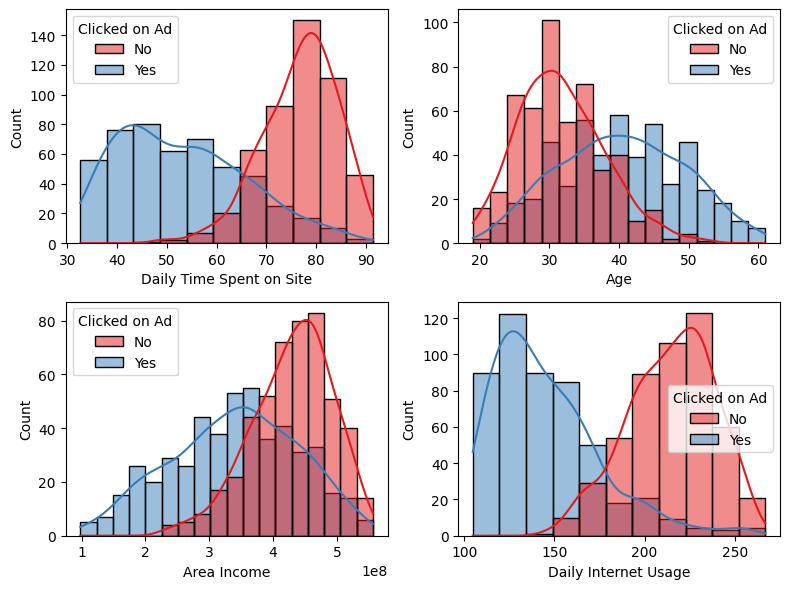

In [ ]:
#bivariate analysis: histogram plot
plt.figure(figsize = (8, 6))
for i in range(len(nums)):
  plt.subplot(2, 2, i + 1)
  sns.histplot(x = df[nums[i]], hue = df['Clicked on Ad'], kde = True, palette = 'Set1')
  plt.tight_layout()

**Penjelasan**
- Waktu yang dihabiskan pada penggunaan website memiliki distribusi yang skew. Pengguna yang mengklik ads memiliki distribusi skew kanan, artinya waktu yang dihabiskan cenderung lebih cepat. Hal ini kebalikan dengan pengguna yang tidak mengklik ads memiliki distribusi skew kiri, artinya waktu yang dihabiskan cenderung lebih lama.
- Umur pengguna yang mengklik ads memiliki distribusi normal, artinya umur pengguna yang mengklik ads merata dari berbagai kalangan umur. Sedangkan, umur pengguna yang tidak mengklik ads cenderung yang memiliki usia lebih muda (di bawah 40 tahun).
- Pendapatan rata-rata wilayah geografis customer yang mengklik ads memiliki distribusi normal, artinya sebaran pengguna yang mengklik ads ini merata di berbagai variasi pendapatan. Sedangkan, pengguna yang tidak mengklik ads cenderung yang memiliki pendapatan yang tinggi (distribusinya skew kiri).
- Semakin lama penggunaan internet tiap hari, maka kecenderungan pengguna mengklik ads semakin rendah. Sedangkan, semakin cepat penggunaan internet tiap hari, maka kecenderungan pengguna yang mengklik ads semakin tinggi juga.

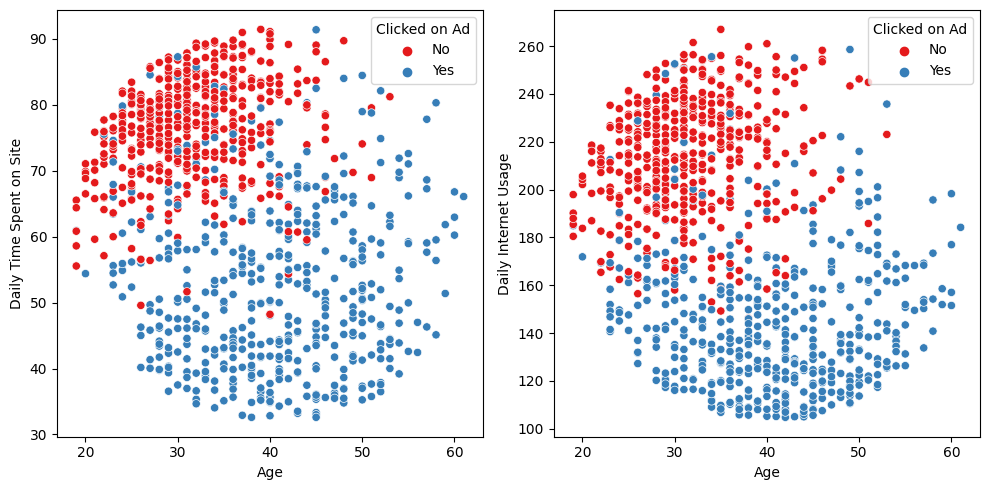

In [ ]:
# bivariate analysis: scatter plot(Age Vs Daily Time Spent on Site, Age Vs Daily Internet Usage)
nums2 = ['Daily Time Spent on Site', 'Daily Internet Usage']
plt.figure(figsize = (10,5))
for i in range(len(nums2)):
  plt.subplot(1, 2, i + 1)
  sns.scatterplot(x = df['Age'], y = df[nums2[i]], hue = df['Clicked on Ad'], palette = 'Set1')
  plt.tight_layout()

**Penjelasan**
- Semakin sedikit waktu yang dihabiskan di website, semakin jarang penggunaan internet, dan semakin tua usia pengguna, maka pengguna akan memiliki kecenderungan yang besar untuk mengklik ads.
- Sebaliknya, semakin muda usia pengguna, semakin banyak waktu yang dihabiskan di website, dan semakin sering penggunaan internet, maka pengguna akan memiliki kecenderungan yang besar untuk tidak mengklik ads.

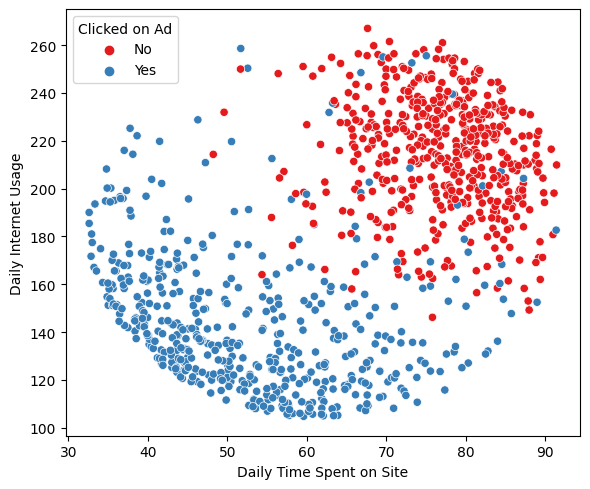

In [ ]:
# bivariate analysis: scatter plot (Daily Time Spent on Site vs Daily Internet Usage)
plt.figure(figsize = (6,5))
sns.scatterplot(x = df['Daily Time Spent on Site'],
                y = df['Daily Internet Usage'],
                hue = df['Clicked on Ad'],
                palette = 'Set1')
plt.tight_layout()

**Penjelasan**

- Semakin sedikit waktu yang dihabiskan di website dan semakin jarang penggunaan internet, maka pengguna memiliki kecenderungan lebih banyak mengklik ads.
- Semakin lama waktu yang dihabiskan di website dan semakin sering penggunaan internet, maka pengguna memiliki kecenderungan lebih sedikit mengklik ads.

<Figure size 1000x600 with 0 Axes>

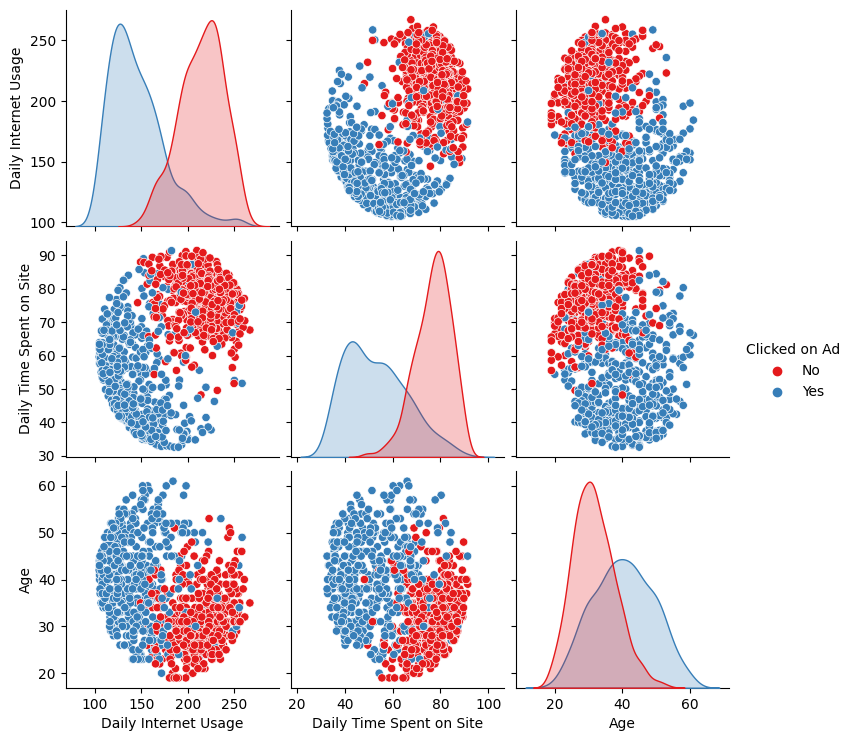

In [ ]:
# bivariate analysis: pairplot
plt.figure(figsize = (10, 6))
sns.pairplot(df[['Daily Internet Usage', 'Daily Time Spent on Site', 'Age', 'Clicked on Ad']],
             diag_kind = 'kde',
             hue = 'Clicked on Ad',
             palette = 'Set1')
plt.show()

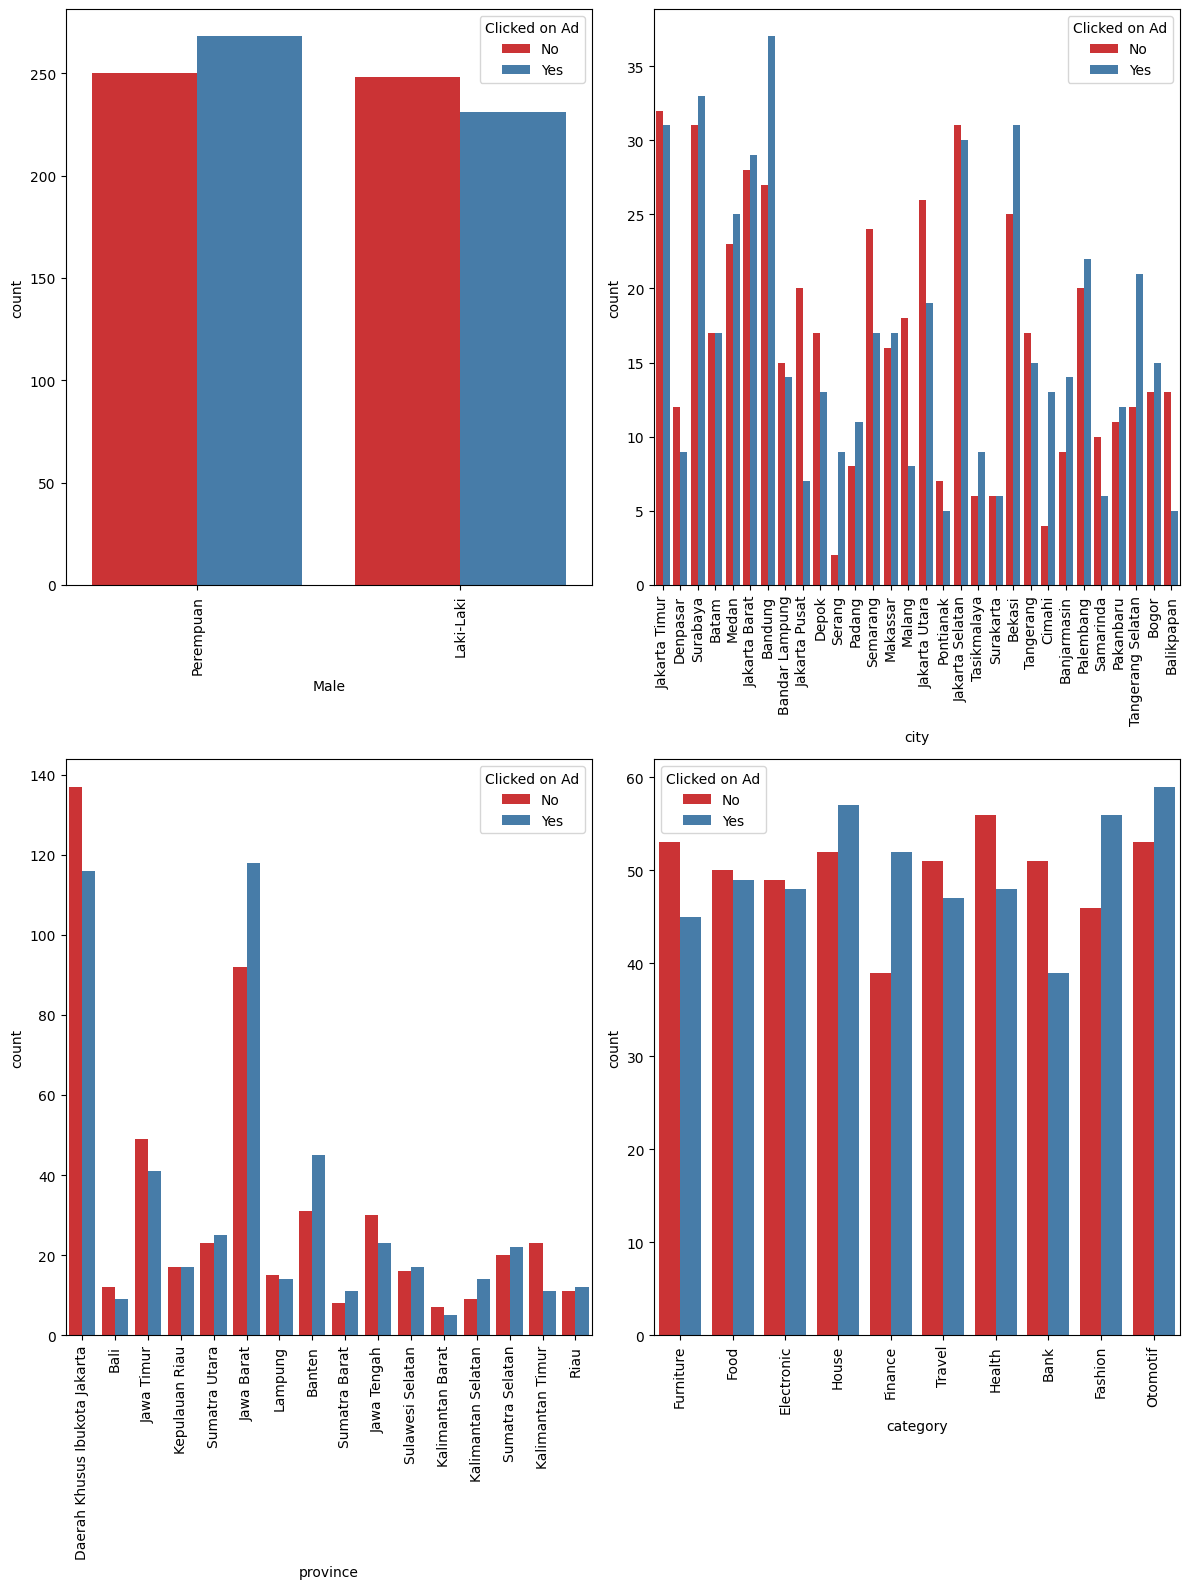

In [ ]:
# categorical feature
cats2 = ['Male', 'city', 'province', 'category']
plt.figure(figsize = (12,16))
for i in range(len(cats2)):
  plt.subplot(2, 2, i + 1)
  sns.countplot(x = df[cats2[i]], hue = df['Clicked on Ad'], palette = 'Set1')
  plt.xlabel(cats2[i])
  plt.xticks(rotation = 90)
  plt.tight_layout()

**Penjelasan**
- Perempuan lebih cenderung mengklik ads dibandingkan laki-laki.
- Tiga kota yang memiliki pengguna yang mengklik ads lebih banyak dibandingkan dengan yang tidak mengkliknya berturut-turut adalah Bandung, Surabaya, dan Bekasi.
- Provinsi Jawa Barat memiliki pengguna tertinggi yang mengklik ads dibandingkan dengan yang tidak mengkliknya.
- Kategori terbanyak yang memiliki jumlah klik ads lebih besar daripada tidak dikliknya adalah otomotif. Sedangkan, kategori health merupakan kategori tertinggi yang memiliki jumlah tidak klik ads lebih besar daripada diklik.

## Multivariate Analysis

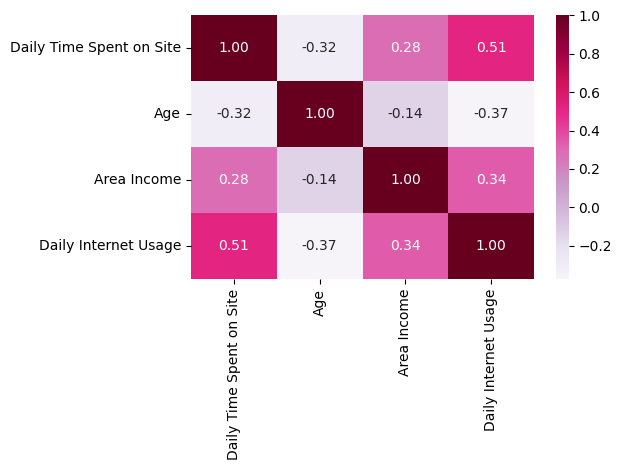

In [ ]:
# multivariate analysis: correlation
df_cor = df.corr(method = 'spearman')
sns.heatmap(data = df_cor, annot = True, cmap = 'PuRd', fmt = '.2f')
plt.tight_layout()

**Penjelasan**
- Penggunaan internet harian memiliki korelasi positif yang tinggi dengan waktu harian yang dihabiskan di website (51%). Semakin sering penggunaan internet, maka semakin lama waktu yang dihabiskan di website juga.
- Usia pengguna memiliki korelasi negatif dengan ketiga fitur lainnya, yaitu pendapatan rata-rata geografis pengguna, waktu yang dihabiskan di website, dan penggunaan internet harian. Usia pengguna yang memiliki korelasi tinggi dengan ketiga fitur tersebut adalah penggunaan internet harian (37%). Semakin tua usia pengguna, maka semakin jarang penggunaan internet harian yang dilakukan.

# Data Cleaning & Preprocessing

## Handle Missing Value

In [ ]:
# check missing value
df.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [ ]:
# check percentage of missing value
miss_value = (df.isna().sum()/len(df))*100
print(miss_value.sort_values(ascending = False))

Daily Time Spent on Site    1.3
Area Income                 1.3
Daily Internet Usage        1.1
Male                        0.3
Age                         0.0
Timestamp                   0.0
Clicked on Ad               0.0
city                        0.0
province                    0.0
category                    0.0
dtype: float64


Terdapat 4 fitur yang memiliki missing value, yaitu Daily Time Spent on Site sebanyak 13 data (1.3%), Area Income sebanyak 13 data (1.3%), Daily Internet Usage sebanyak 11 data (1.1%), dan Male sebanyak 3 data (0.3%).

In [ ]:
# copy dataset
df_pre = df.copy()
df_pre.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [ ]:
# fill in the missing value: numerical feature
df_pre['Daily Time Spent on Site'].fillna(df_pre['Daily Time Spent on Site'].median(),
                                          inplace = True)
df_pre['Area Income'].fillna(df_pre['Area Income'].median(),
                             inplace = True)
df_pre['Daily Internet Usage'].fillna(df_pre['Daily Internet Usage'].median(),
                                      inplace = True)
df_pre.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        3
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

Pengisian pada missing value fitur numerikal menggunakan nilai median karena median relatif robust dari outlier (tidak terpengaruh oleh nilai yang sangat tinggi atau rendah) dan tidak mempengaruhi sebaran data di awal.

In [ ]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 85.9+ KB


In [ ]:
# fill in the missing value: categorical feature
df_pre['Male'].fillna(df_pre['Male'].mode()[0], inplace = True)
df_pre.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

Pengisian pada missing value fitur categorical menggunakan nilai modus, yaitu nilai yang paling sering muncul pada fitur Male. Modus pada fitur Male adalah Perempuan.

## Handle Outlier

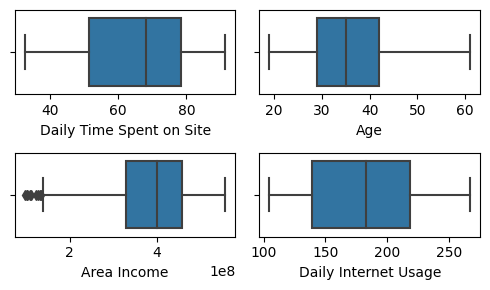

In [ ]:
# Boxplot
pre_nums = df_pre.select_dtypes(['float64', 'int64']).columns
plt.figure(figsize = (5, 3))
for i in range(len(pre_nums)):
  plt.subplot(2, 2, i + 1)
  sns.boxplot(x = df_pre[pre_nums[i]])
  plt.tight_layout()

Terdapat fitur Area Income yang memiliki outlier.

In [ ]:
# handle outlier with IQR
print('Jumlah sebelum filter:', len(df_pre))

for i in pre_nums:
  Q1 = df_pre[i].quantile(0.25)
  Q3 = df_pre[i].quantile(0.75)
  IQR = Q3 - Q1
  low_limit = Q1 - (1.5 * IQR)
  high_limit = Q3 + (1.5 * IQR)
  filtered_entries = (df_pre[i] >= low_limit) & (df_pre[i] <= high_limit)
  df_pre = df_pre[filtered_entries]

print('Jumlah setelah filter:', len(df_pre))

Jumlah sebelum filter: 1000
Jumlah setelah filter: 991


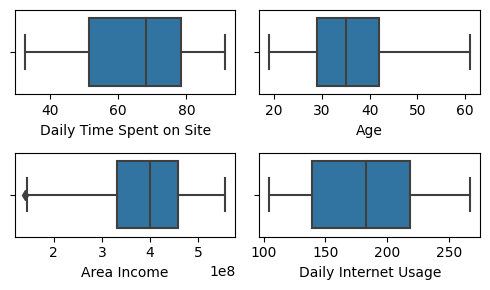

In [ ]:
# Recheck Boxplot
plt.figure(figsize = (5, 3))
for i in range(len(pre_nums)):
  plt.subplot(2, 2, i + 1)
  sns.boxplot(x = df_pre[pre_nums[i]])
  plt.tight_layout()

## Feature Engineering

### Feature Extraction

In [ ]:
# feature extraction: Timestamp
df_pre['Timestamp'] = pd.to_datetime(df_pre['Timestamp'])

df_pre['month'] = df_pre['Timestamp'].apply(lambda x : x.month)
df_pre['weekday'] = df_pre['Timestamp'].apply(lambda x : x.isoweekday())
df_pre['day'] = df_pre['Timestamp'].apply(lambda x : x.day)
df_pre['week'] = df_pre['Timestamp'].apply(lambda x : x.week)
df_pre['year'] = df_pre['Timestamp'].apply(lambda x : x.year)

Tipe data pada fitur Timestamp diubah menjadi tipe data datetime yang awalnya adalah tipe data object. Kemudian, dilakukan fitur ekstraksi dari fitur tersebut menjadi fitur month, weekday, day, week, dan year.

### Feature Encoding

In [ ]:
df_pre['Male'].value_counts()

Perempuan    518
Laki-Laki    473
Name: Male, dtype: int64

In [ ]:
df_pre['Clicked on Ad'].value_counts()

No     500
Yes    491
Name: Clicked on Ad, dtype: int64

In [ ]:
# rename column: Male to Gender
df_pre.rename(columns = {'Male':'Gender'}, inplace = True)

In [ ]:
# Label Encoding
df_pre['Gender'] = df_pre['Gender'].map({'Laki-Laki': 0,
                                         'Perempuan' : 1})
df_pre['Clicked on Ad'] = df_pre['Clicked on Ad'].map({'No' : 0,
                                                       'Yes' : 1})
df_pre.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category,month,weekday,day,week,year
397,50.52,28,468503210.0,219.69,1,2016-04-03 06:17:00,1,Denpasar,Bali,House,4,7,3,13,2016
458,64.88,42,490038570.0,129.80,0,2016-02-14 22:23:00,1,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Bank,2,7,14,6,2016
914,41.86,39,371292390.0,128.62,0,2016-03-26 15:28:00,1,Cimahi,Jawa Barat,Finance,3,6,26,12,2016
523,67.94,43,479130190.0,128.16,1,2016-05-01 00:23:00,1,Surabaya,Jawa Timur,Fashion,5,7,1,17,2016
563,62.26,37,545920970.0,166.19,1,2016-05-26 15:40:00,0,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Travel,5,4,26,21,2016


In [ ]:
# Candidate Feature for One Hote Encoding
print(df_pre['city'].nunique())
print(df_pre['province'].nunique())
print(df_pre['category'].nunique())

30
16
10


Fitur yang dilakukan One Hot Encoding adalah fitur category karena hanya memiliki nilai unique yang paling sedikit, sedangkan kedua fitur lainnya, seperti city dan province tidak dilakukan sebab jika fitur terlalu banyak, maka hal itu dapat menyebabkan kutukan dimensi yang dapat menyebabkan pengurangan performance model.

In [ ]:
# One Hot Encoding
df_pre = pd.get_dummies(df_pre, columns = ['category'])
df_pre.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,month,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,1,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,3,...,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,0,2016-04-04 01:39:00,0,Denpasar,Bali,4,...,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,1,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,3,...,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,0,2016-01-10 02:31:00,0,Batam,Kepulauan Riau,1,...,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,1,2016-06-03 03:36:00,0,Medan,Sumatra Utara,6,...,0,0,0,1,0,0,0,0,0,0


### Feature Selection

In [ ]:
# copy dataset
df_mod = df_pre.copy()

In [ ]:
# feature selection
df_mod = df_mod.select_dtypes(['float64', 'int64','uint8'])
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  991 non-null    float64
 1   Age                       991 non-null    int64  
 2   Area Income               991 non-null    float64
 3   Daily Internet Usage      991 non-null    float64
 4   Gender                    991 non-null    int64  
 5   Clicked on Ad             991 non-null    int64  
 6   month                     991 non-null    int64  
 7   weekday                   991 non-null    int64  
 8   day                       991 non-null    int64  
 9   week                      991 non-null    int64  
 10  year                      991 non-null    int64  
 11  category_Bank             991 non-null    uint8  
 12  category_Electronic       991 non-null    uint8  
 13  category_Fashion          991 non-null    uint8  
 14  category_F

## Split Data

In [ ]:
# Define x_data1 and y_data1 for model 1
x_data1 = df_mod.drop('Clicked on Ad', axis = 1)
y_data1 = df_mod['Clicked on Ad']

In [ ]:
# Define x_data and y_data for model 2
x_data2 = df_mod.drop('Clicked on Ad', axis = 1)
y_data2 = df_mod[['Clicked on Ad']]

In [ ]:
# Standardisation of Data for model 2

# import library standard scaler
cols = x_data2.columns
from sklearn.preprocessing import StandardScaler
for i in range(0, len(cols)):
  x_data2[cols[i]] = StandardScaler().fit_transform(x_data2[cols[i]].values.reshape(len(x_data2), 1))

In [ ]:
#split data into train set and test set

#import library train_test_split
from sklearn.model_selection import train_test_split

#data train: 80%, data test: 20% for model1
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data1, y_data1, test_size = 0.2, random_state = 42)

#data train : 80%, data test : 20% for model2
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data2, y_data2, test_size = 0.2, random_state = 42)

In [ ]:
# check number of data train and data test: just one model
print('Split into 80 : 20')
print('Total rows & columns of train set:', x_train1.shape)
print('Total rows & columns of test set:', x_test1.shape)

Split into 80 : 20
Total rows & columns of train set: (792, 20)
Total rows & columns of test set: (199, 20)


# Modelling

In [ ]:
# Function for Metric Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, y_pred_train, y_test_pred, y_train, y_test):
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("F1 Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1 Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    fpr, tpr, thresholds = roc_curve(y_train, y_pred_train, pos_label = 1) # pos_label: label yang kita anggap positive
    print("AUC (Train Set): %.2f" % auc(fpr, tpr))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1) # pos_label: label yang kita anggap positive
    print("AUC (Test Set): %.2f" % auc(fpr, tpr))

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def cfm(y_test,y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.set(font_scale = 1)
    ax = sns.heatmap(cf_matrix, annot = True, fmt = 'd')
    plt.title('Confusion Matrix From Test Set',fontsize = 14)
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()

## Before Standardization

### Logistic Regression

In [ ]:
# import library logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
# default parameter
logreg1 = LogisticRegression(random_state = 42)
logreg1.fit(x_train1, y_train1)

y_pred_train = logreg1.predict(x_train1)
y_pred = logreg1.predict(x_test1)

# check model performance : default parameter
eval_classification(logreg1, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.52
Accuracy (Train Set): 0.50
Recall (Test Set): 0.00
Recall (Train Set): 0.00
Precision (Test Set): 0.00
Precision (Train Set): 0.00
F1 Score (Test Set): 0.00
F1 Score (Train Set): 0.00
AUC (Train Set): 0.50
AUC (Test Set): 0.50


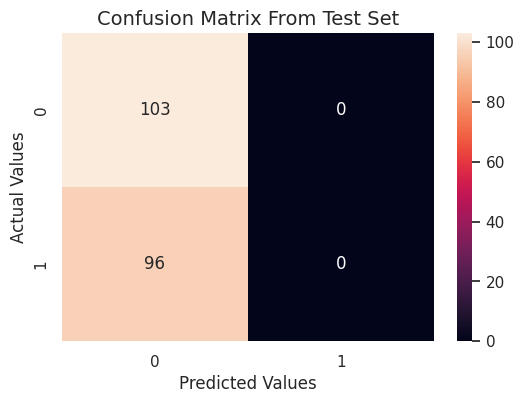

In [ ]:
# confusion matrix : default parameter
cfm(y_test1,y_pred)

In [ ]:
# hyperparamater tuning
from sklearn.model_selection import GridSearchCV

# List of hyperparameter
penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.002, 0.003, 75)]
solver = ['newton-cholesky']

hyperparameters = dict(penalty = penalty, C = C, solver = solver)

logreg1 = LogisticRegression(random_state = 42)
logreg1_tuned = GridSearchCV(logreg1, hyperparameters, cv = 5, scoring = 'accuracy')
logreg1_tuned.fit(x_train1, y_train1)

y_pred_train = logreg1_tuned.predict(x_train1)
y_pred = logreg1_tuned.predict(x_test1)

eval_classification(logreg1_tuned, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.93
Recall (Test Set): 0.90
Recall (Train Set): 0.93
Precision (Test Set): 0.93
Precision (Train Set): 0.94
F1 Score (Test Set): 0.91
F1 Score (Train Set): 0.93
AUC (Train Set): 0.93
AUC (Test Set): 0.92


In [ ]:
show_best_hyperparameter(logreg1_tuned)

{'C': 0.002527027027027027, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cholesky', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
lr_tuned1 = LogisticRegression(random_state = 42,
                              C = 0.002527027027027027,
                              penalty = 'l2',
                              solver = 'newton-cholesky'
                              ).fit(x_train1, y_train1)
eval_classification(lr_tuned1, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.93
Recall (Test Set): 0.90
Recall (Train Set): 0.93
Precision (Test Set): 0.93
Precision (Train Set): 0.94
F1 Score (Test Set): 0.91
F1 Score (Train Set): 0.93
AUC (Train Set): 0.93
AUC (Test Set): 0.92


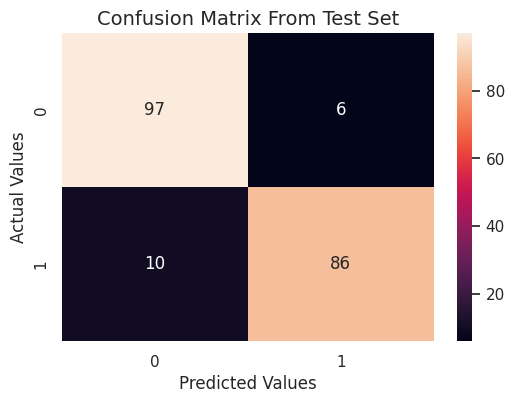

In [ ]:
# confusion matrix : hyperparameter tuning
cfm(y_test1,y_pred)

### K-Nearest Neighbors

In [ ]:
# import library k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# default parameter
knn1 = KNeighborsClassifier()
knn1.fit(x_train1, y_train1)

y_pred_train = knn1.predict(x_train1)
y_pred = knn1.predict(x_test1)

# check model performance : default parameter
eval_classification(knn1, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.62
Accuracy (Train Set): 0.78
Recall (Test Set): 0.49
Recall (Train Set): 0.74
Precision (Test Set): 0.64
Precision (Train Set): 0.80
F1 Score (Test Set): 0.55
F1 Score (Train Set): 0.77
AUC (Train Set): 0.78
AUC (Test Set): 0.61


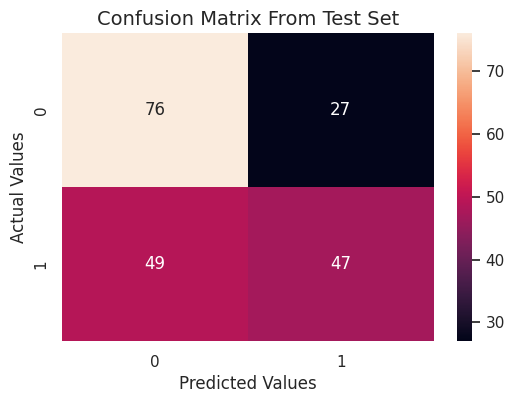

In [ ]:
# confusion matrix : default parameter
cfm(y_test1,y_pred)

In [ ]:
# hyperparamater tuning
from sklearn.model_selection import GridSearchCV

n_neighbors = list(range(1,30))
weights = ['uniform']
p = [1, 2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

hyperparameters = dict(n_neighbors = n_neighbors,
                       weights = weights,
                       p = p,
                       algorithm = algorithm)

knn = KNeighborsClassifier()
knn1_tuned = GridSearchCV(knn, hyperparameters, cv = 5, scoring = 'accuracy')
knn1_tuned.fit(x_train1, y_train1)

y_pred_train = knn1_tuned.predict(x_train1)
y_pred = knn1_tuned.predict(x_test1)

eval_classification(knn1_tuned, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.65
Accuracy (Train Set): 0.73
Recall (Test Set): 0.52
Recall (Train Set): 0.67
Precision (Test Set): 0.68
Precision (Train Set): 0.76
F1 Score (Test Set): 0.59
F1 Score (Train Set): 0.71
AUC (Train Set): 0.73
AUC (Test Set): 0.65


In [ ]:
show_best_hyperparameter(knn1_tuned)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 27, 'p': 1, 'weights': 'uniform'}


In [ ]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
knn1_tuned = KNeighborsClassifier(n_neighbors = 27,
                                 p = 1,
                                 leaf_size = 30,
                                 weights = 'uniform',
                                 algorithm = 'auto').fit(x_train1, y_train1)
eval_classification(knn1_tuned, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.65
Accuracy (Train Set): 0.73
Recall (Test Set): 0.52
Recall (Train Set): 0.67
Precision (Test Set): 0.68
Precision (Train Set): 0.76
F1 Score (Test Set): 0.59
F1 Score (Train Set): 0.71
AUC (Train Set): 0.73
AUC (Test Set): 0.65


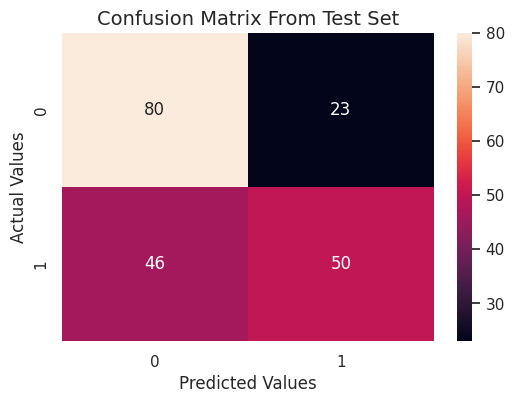

In [ ]:
# confusion matrix : hyperparameter tuning
cfm(y_test1,y_pred)

### Decision Tree

In [ ]:
# import library decision tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# default parameter
dt1 = DecisionTreeClassifier(random_state = 42)
dt1.fit(x_train1, y_train1)

y_pred_train = dt1.predict(x_train1)
y_pred = dt1.predict(x_test1)

# check model performance : default parameter
eval_classification(dt1, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.95
Accuracy (Train Set): 1.00
Recall (Test Set): 0.95
Recall (Train Set): 1.00
Precision (Test Set): 0.95
Precision (Train Set): 1.00
F1 Score (Test Set): 0.95
F1 Score (Train Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 0.95


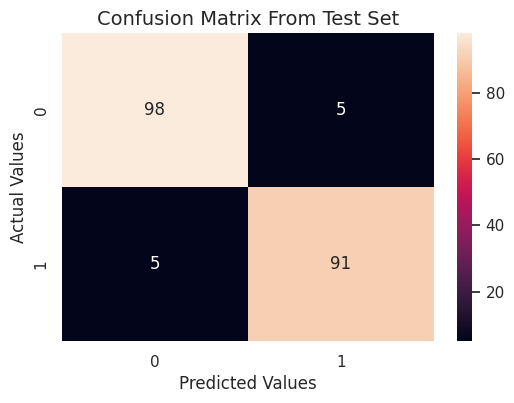

In [ ]:
# confusion matrix : default parameter
cfm(y_test1,y_pred)

In [ ]:
# hyperparamater tuning
from sklearn.model_selection import GridSearchCV

hyperparameters = dict(
                       criterion = ['entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 20, num = 20)],
                       min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 50, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 50, num = 5)],
                       max_features = ['auto'],
                       splitter = ['best'])

dt = DecisionTreeClassifier(random_state = 42)
dt1_tuned = GridSearchCV(dt, hyperparameters, cv = 5, scoring = 'accuracy')
dt1_tuned.fit(x_train1, y_train1)

y_pred_train = dt1_tuned.predict(x_train1)
y_pred = dt1_tuned.predict(x_test1)

eval_classification(dt1_tuned, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 0.97
Recall (Test Set): 0.94
Recall (Train Set): 0.95
Precision (Test Set): 0.93
Precision (Train Set): 0.98
F1 Score (Test Set): 0.93
F1 Score (Train Set): 0.97
AUC (Train Set): 0.97
AUC (Test Set): 0.93


In [ ]:
show_best_hyperparameter(dt1_tuned)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 13, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 13, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [ ]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
dt1_tuned = DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = 13,
                                   min_samples_split = 13,
                                   min_samples_leaf = 1,
                                   max_features = 'auto',
                                   splitter = 'best').fit(x_train1, y_train1)

eval_classification(dt1_tuned, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 0.97
Recall (Test Set): 0.94
Recall (Train Set): 0.95
Precision (Test Set): 0.93
Precision (Train Set): 0.98
F1 Score (Test Set): 0.93
F1 Score (Train Set): 0.97
AUC (Train Set): 0.97
AUC (Test Set): 0.93


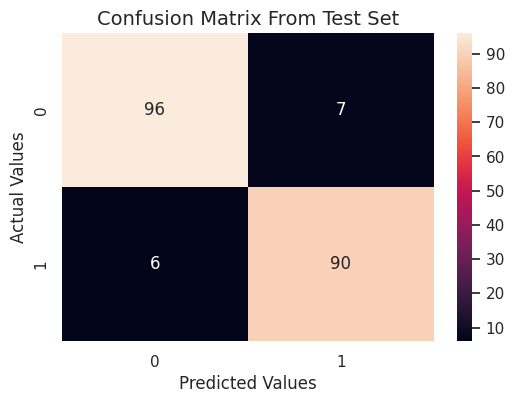

In [ ]:
# confusion matrix : hyperparameter tuning
cfm(y_test1 ,y_pred)

### Random Forest

In [ ]:
# import library random forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# default parameter
rf1 = RandomForestClassifier(random_state = 42)
rf1.fit(x_train1, y_train1)

y_pred_train = rf1.predict(x_train1)
y_pred = rf1.predict(x_test1)

# check model performance : default parameter
eval_classification(rf1, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Recall (Test Set): 0.97
Recall (Train Set): 1.00
Precision (Test Set): 0.97
Precision (Train Set): 1.00
F1 Score (Test Set): 0.97
F1 Score (Train Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 0.97


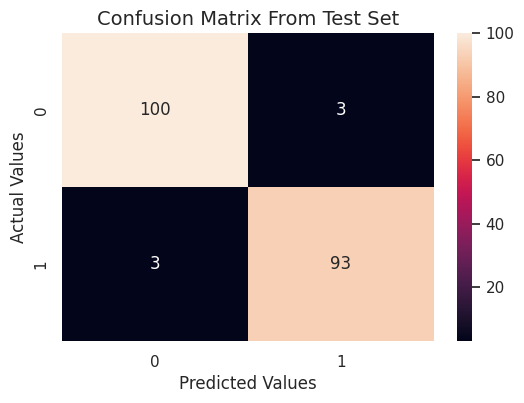

In [ ]:
# confusion matrix : default parameter
cfm(y_test1,y_pred)

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#List of hyperparameters
hyperparameters = dict(
                       n_estimators = [100, 110],
                       bootstrap = [True],
                       criterion = ['gini'],
                       max_depth = [13, 14],
                       min_samples_split = [13, 14],
                       min_samples_leaf = [1, 2],
                       max_features = ['auto','sqrt','log2'],
                       n_jobs = [-1])

rf = RandomForestClassifier(random_state = 42)
rf1_tuned = GridSearchCV(rf, hyperparameters, cv = 5, scoring = 'accuracy')
rf1_tuned.fit(x_train1,y_train1)

y_pred_train = rf1_tuned.predict(x_train1)
y_pred = rf1_tuned.predict(x_test1)

eval_classification(rf1_tuned, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.98
Recall (Test Set): 0.97
Recall (Train Set): 0.98
Precision (Test Set): 0.97
Precision (Train Set): 0.99
F1 Score (Test Set): 0.97
F1 Score (Train Set): 0.98
AUC (Train Set): 0.98
AUC (Test Set): 0.97


In [ ]:
show_best_hyperparameter(rf1_tuned)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 13, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 14, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
rf1_tuned = RandomForestClassifier(n_estimators = 100,
                                   bootstrap = True,
                                   criterion = 'gini',
                                   max_depth = 13,
                                   min_samples_split = 14,
                                   min_samples_leaf = 1,
                                   max_features = 'auto',
                                   n_jobs = -1).fit(x_train1, y_train1)

eval_classification(rf1_tuned, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.98
Recall (Test Set): 0.97
Recall (Train Set): 0.98
Precision (Test Set): 0.97
Precision (Train Set): 0.99
F1 Score (Test Set): 0.97
F1 Score (Train Set): 0.98
AUC (Train Set): 0.98
AUC (Test Set): 0.97


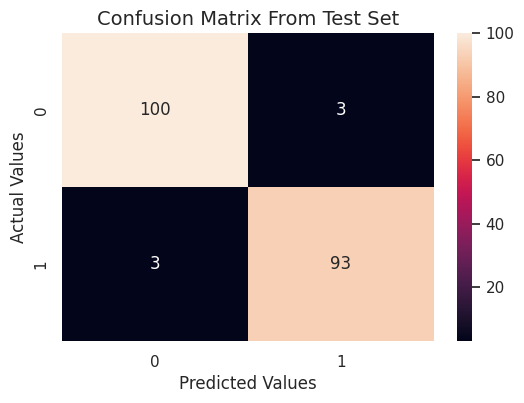

In [ ]:
# confusion matrix : hyperparameter tuning
cfm(y_test1, y_pred)

### Gradient Boosting

In [ ]:
# import library Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# default parameter
grad1 = GradientBoostingClassifier(random_state = 42)
grad1.fit(x_train1, y_train1)

y_pred_train = grad1.predict(x_train1)
y_pred = grad1.predict(x_test1)

# check model performance: default parameter
eval_classification(grad1, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Recall (Test Set): 0.97
Recall (Train Set): 1.00
Precision (Test Set): 0.97
Precision (Train Set): 1.00
F1 Score (Test Set): 0.97
F1 Score (Train Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 0.97


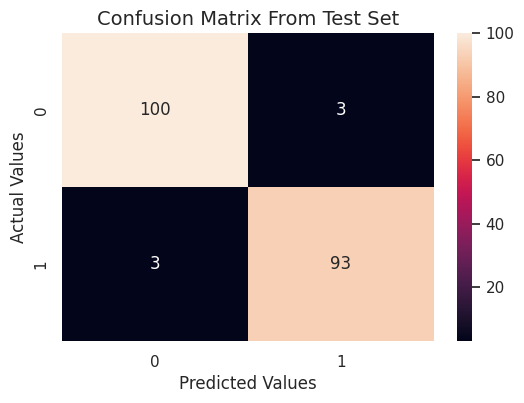

In [ ]:
# confusion matrix : default parameter
cfm(y_test1, y_pred)

In [ ]:
# List of hyperparameters
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(10, 50, num = 10)],
                       criterion = ['friedman_mse', 'squared_error'],
                       max_depth = [2, 3],
                       min_samples_split = [1, 2, 3],
                       min_samples_leaf = [1, 2, 3],
                       max_features = ['sqrt'],
                       loss = ['exponential'])

grad = GradientBoostingClassifier(random_state = 42)
grad1_tuned = GridSearchCV(grad, hyperparameters, cv = 5, scoring = 'accuracy')
grad1_tuned.fit(x_train1, y_train1)

y_pred_train = grad1_tuned.predict(x_train1)
y_pred = grad1_tuned.predict(x_test1)

# check model performance: default parameter
eval_classification(grad1_tuned, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.98
Recall (Test Set): 0.96
Recall (Train Set): 0.97
Precision (Test Set): 0.95
Precision (Train Set): 0.99
F1 Score (Test Set): 0.95
F1 Score (Train Set): 0.98
AUC (Train Set): 0.98
AUC (Test Set): 0.95


In [ ]:
show_best_hyperparameter(grad1_tuned)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 41, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [ ]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
grad1_tuned = GradientBoostingClassifier(n_estimators = 41,
                                   criterion = 'friedman_mse',
                                   max_depth = 3,
                                   min_samples_split = 2,
                                   min_samples_leaf = 2,
                                   max_features = 'sqrt',
                                   loss = 'exponential').fit(x_train1, y_train1)

eval_classification(grad1_tuned, y_pred_train, y_pred, y_train1, y_test1)

Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.98
Recall (Test Set): 0.96
Recall (Train Set): 0.97
Precision (Test Set): 0.95
Precision (Train Set): 0.99
F1 Score (Test Set): 0.95
F1 Score (Train Set): 0.98
AUC (Train Set): 0.98
AUC (Test Set): 0.95


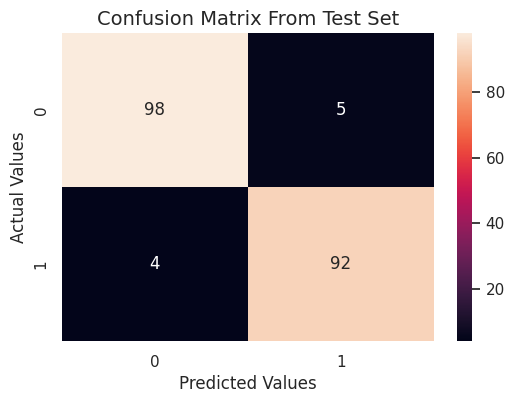

In [ ]:
# confusion matrix : default parameter
cfm(y_test1, y_pred)

## After Standardization

### Logistic Regression

In [ ]:
# default parameter
logreg2 = LogisticRegression(random_state = 42)
logreg2.fit(x_train2, y_train2)

y_pred_train = logreg2.predict(x_train2)
y_pred = logreg2.predict(x_test2)

# check model performance : default parameter
eval_classification(logreg2, y_pred_train, y_pred, y_train2, y_test2)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.97
Recall (Test Set): 0.97
Recall (Train Set): 0.96
Precision (Test Set): 0.97
Precision (Train Set): 0.98
F1 Score (Test Set): 0.97
F1 Score (Train Set): 0.97
AUC (Train Set): 0.97
AUC (Test Set): 0.97


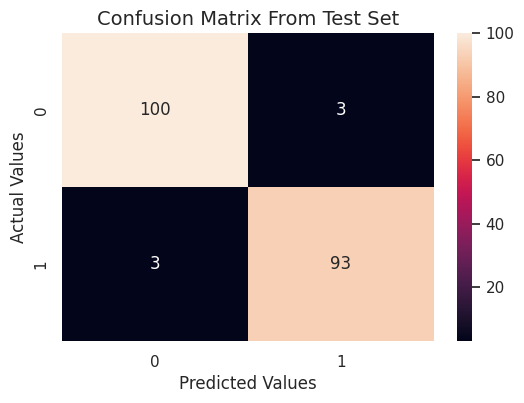

In [ ]:
# confusion matrix : default parameter
cfm(y_test1,y_pred)

In [ ]:
# hyperparamater tuning
from sklearn.model_selection import GridSearchCV

# List of hyperparameter
penalty = ['l2','l1']
C = [float(x) for x in np.linspace(0.00015, 0.0002, 100)]
solver = ['liblinear']
multi_class= ['multinomial']

hyperparameters = dict(penalty = penalty, C = C, solver = solver)

logreg2 = LogisticRegression(random_state = 42)
logreg2_tuned = GridSearchCV(logreg2, hyperparameters, cv = 5, scoring = 'accuracy')
logreg2_tuned.fit(x_train2, y_train2)

y_pred_train = logreg2_tuned.predict(x_train2)
y_pred = logreg2_tuned.predict(x_test2)

eval_classification(logreg2_tuned, y_pred_train, y_pred, y_train2, y_test2)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.95
Recall (Test Set): 0.94
Recall (Train Set): 0.91
Precision (Test Set): 0.99
Precision (Train Set): 0.99
F1 Score (Test Set): 0.96
F1 Score (Train Set): 0.95
AUC (Train Set): 0.95
AUC (Test Set): 0.96


In [ ]:
show_best_hyperparameter(logreg2_tuned)

{'C': 0.00015, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
lr_tuned2 = LogisticRegression(random_state = 42,
                              C = 0.00015,
                              penalty = 'l2',
                              solver = 'liblinear'
                              ).fit(x_train2, y_train2)
eval_classification(lr_tuned2, y_pred_train, y_pred, y_train2, y_test2)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.95
Recall (Test Set): 0.94
Recall (Train Set): 0.91
Precision (Test Set): 0.99
Precision (Train Set): 0.99
F1 Score (Test Set): 0.96
F1 Score (Train Set): 0.95
AUC (Train Set): 0.95
AUC (Test Set): 0.96


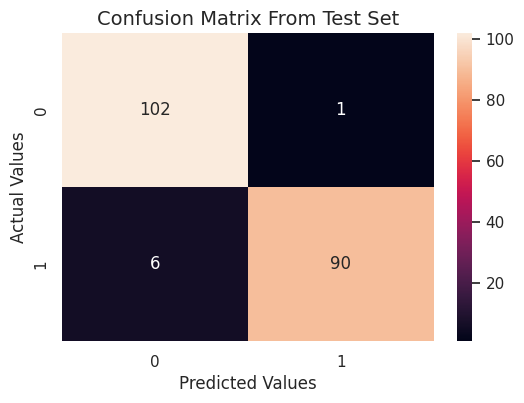

In [ ]:
# confusion matrix : hyperparameter tuning
cfm(y_test2, y_pred)

### K-Nearest Neighbors

In [ ]:
# default parameter
knn2 = KNeighborsClassifier()
knn2.fit(x_train2, y_train2)

y_pred_train = knn2.predict(x_train2)
y_pred = knn2.predict(x_test2)

# check model performance : default parameter
eval_classification(knn2, y_pred_train, y_pred, y_train2, y_test2)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.96
Recall (Test Set): 0.91
Recall (Train Set): 0.92
Precision (Test Set): 0.98
Precision (Train Set): 0.99
F1 Score (Test Set): 0.94
F1 Score (Train Set): 0.95
AUC (Train Set): 0.96
AUC (Test Set): 0.94


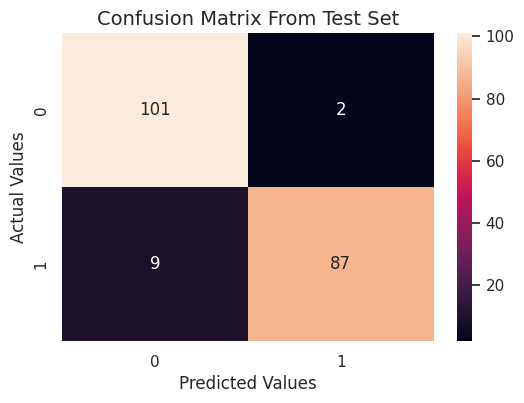

In [ ]:
# confusion matrix : default parameter
cfm(y_test2, y_pred)

In [ ]:
# hyperparamater tuning
from sklearn.model_selection import GridSearchCV

n_neighbors = list(range(1,30))
weights = ['uniform']
p = [1, 2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

hyperparameters = dict(n_neighbors = n_neighbors,
                       weights = weights,
                       p = p,
                       algorithm = algorithm)

knn = KNeighborsClassifier()
knn2_tuned = GridSearchCV(knn, hyperparameters, cv = 5, scoring = 'accuracy')
knn2_tuned.fit(x_train2, y_train2)

y_pred_train = knn2_tuned.predict(x_train2)
y_pred = knn2_tuned.predict(x_test2)

eval_classification(knn2_tuned, y_pred_train, y_pred, y_train2, y_test2)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.96
Recall (Test Set): 0.91
Recall (Train Set): 0.92
Precision (Test Set): 0.98
Precision (Train Set): 0.99
F1 Score (Test Set): 0.94
F1 Score (Train Set): 0.95
AUC (Train Set): 0.96
AUC (Test Set): 0.94


In [ ]:
show_best_hyperparameter(knn2_tuned)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [ ]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
knn2_tuned = KNeighborsClassifier(n_neighbors = 5,
                                 p = 2,
                                 leaf_size = 30,
                                 weights = 'uniform',
                                 algorithm = 'auto').fit(x_train2, y_train2)
eval_classification(knn2_tuned, y_pred_train, y_pred, y_train2, y_test2)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.96
Recall (Test Set): 0.91
Recall (Train Set): 0.92
Precision (Test Set): 0.98
Precision (Train Set): 0.99
F1 Score (Test Set): 0.94
F1 Score (Train Set): 0.95
AUC (Train Set): 0.96
AUC (Test Set): 0.94


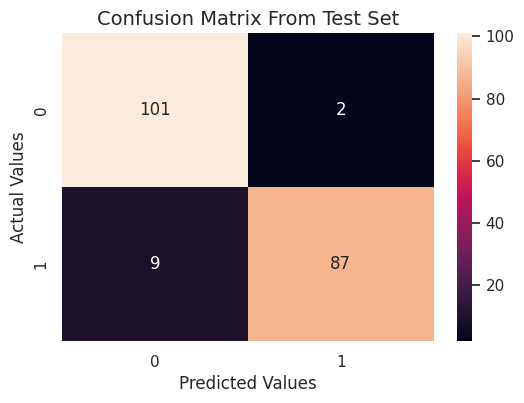

In [ ]:
# confusion matrix : hyperparameter tuning
cfm(y_test2, y_pred)

### Decision Tree

In [ ]:
# default parameter
dt2 = DecisionTreeClassifier(random_state = 42)
dt2.fit(x_train2, y_train2)

y_pred_train = dt2.predict(x_train2)
y_pred = dt2.predict(x_test2)

# check model performance : default parameter
eval_classification(dt2, y_pred_train, y_pred, y_train2, y_test2)

Accuracy (Test Set): 0.95
Accuracy (Train Set): 1.00
Recall (Test Set): 0.95
Recall (Train Set): 1.00
Precision (Test Set): 0.95
Precision (Train Set): 1.00
F1 Score (Test Set): 0.95
F1 Score (Train Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 0.95


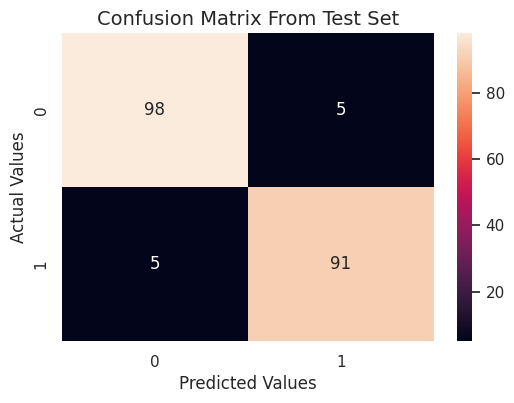

In [ ]:
# confusion matrix : default parameter
cfm(y_test2, y_pred)

In [ ]:
# hyperparamater tuning
from sklearn.model_selection import GridSearchCV

hyperparameters = dict(
                       criterion = ['entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 20, num = 20)],
                       min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 50, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 50, num = 5)],
                       max_features = ['auto', 'sqrt', 'log2'],
                       splitter = ['best'])

dt = DecisionTreeClassifier(random_state = 42)
dt2_tuned = GridSearchCV(dt, hyperparameters, cv = 5, scoring = 'accuracy')
dt2_tuned.fit(x_train2, y_train2)

y_pred_train = dt2_tuned.predict(x_train2)
y_pred = dt2_tuned.predict(x_test2)

eval_classification(dt2_tuned, y_pred_train, y_pred, y_train2, y_test2)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 0.97
Recall (Test Set): 0.94
Recall (Train Set): 0.95
Precision (Test Set): 0.93
Precision (Train Set): 0.98
F1 Score (Test Set): 0.93
F1 Score (Train Set): 0.97
AUC (Train Set): 0.97
AUC (Test Set): 0.93


In [ ]:
show_best_hyperparameter(dt2_tuned)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 13, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 13, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [ ]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
dt2_tuned = DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = 13,
                                   min_samples_split = 13,
                                   min_samples_leaf = 1,
                                   max_features = 'auto',
                                   splitter = 'best').fit(x_train2, y_train2)

eval_classification(dt2_tuned, y_pred_train, y_pred, y_train2, y_test2)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 0.97
Recall (Test Set): 0.94
Recall (Train Set): 0.95
Precision (Test Set): 0.93
Precision (Train Set): 0.98
F1 Score (Test Set): 0.93
F1 Score (Train Set): 0.97
AUC (Train Set): 0.97
AUC (Test Set): 0.93


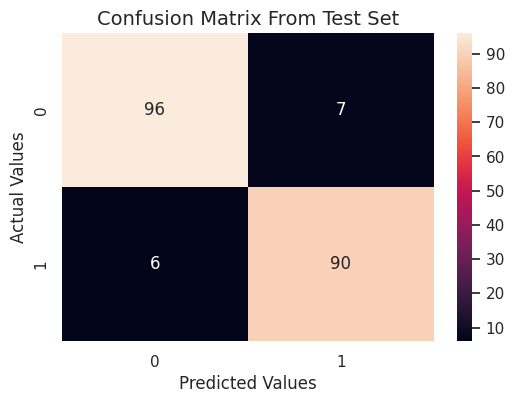

In [ ]:
# confusion matrix : hyperparameter tuning
cfm(y_test2 ,y_pred)

### Random Forest

In [ ]:
# default parameter
rf2 = RandomForestClassifier(random_state = 42)
rf2.fit(x_train2, y_train2)

y_pred_train = rf2.predict(x_train2)
y_pred = rf2.predict(x_test2)

# check model performance : default parameter
eval_classification(rf2, y_pred_train, y_pred, y_train2, y_test2)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Recall (Test Set): 0.97
Recall (Train Set): 1.00
Precision (Test Set): 0.97
Precision (Train Set): 1.00
F1 Score (Test Set): 0.97
F1 Score (Train Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 0.97


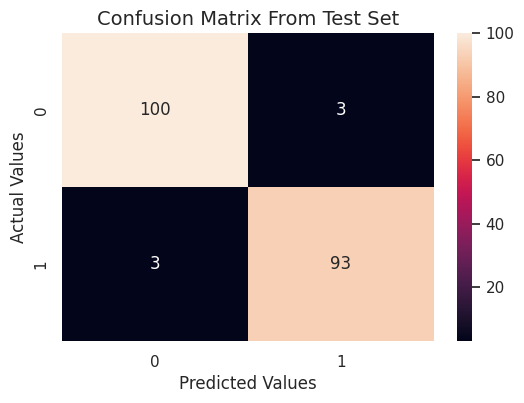

In [ ]:
# confusion matrix : default parameter
cfm(y_test2, y_pred)

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#List of hyperparameters
hyperparameters = dict(
                       n_estimators = [100, 110],
                       bootstrap = [True],
                       criterion = ['gini'],
                       max_depth = [13, 14],
                       min_samples_split = [13, 14],
                       min_samples_leaf = [1, 2],
                       max_features = ['auto','sqrt','log2'],
                       n_jobs = [-1])

rf = RandomForestClassifier(random_state = 42)
rf2_tuned = GridSearchCV(rf, hyperparameters, cv = 5, scoring = 'accuracy')
rf2_tuned.fit(x_train2, y_train2)

y_pred_train = rf2_tuned.predict(x_train2)
y_pred = rf2_tuned.predict(x_test2)

eval_classification(rf2_tuned, y_pred_train, y_pred, y_train2, y_test2)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.98
Recall (Test Set): 0.97
Recall (Train Set): 0.98
Precision (Test Set): 0.97
Precision (Train Set): 0.99
F1 Score (Test Set): 0.97
F1 Score (Train Set): 0.98
AUC (Train Set): 0.98
AUC (Test Set): 0.97


In [ ]:
show_best_hyperparameter(rf2_tuned)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 13, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 14, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
rf2_tuned = RandomForestClassifier(n_estimators = 100,
                                   bootstrap = True,
                                   criterion = 'gini',
                                   max_depth = 13,
                                   min_samples_split = 14,
                                   min_samples_leaf = 1,
                                   max_features = 'auto',
                                   n_jobs = -1).fit(x_train2, y_train2)

eval_classification(rf2_tuned, y_pred_train, y_pred, y_train2, y_test2)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.98
Recall (Test Set): 0.97
Recall (Train Set): 0.98
Precision (Test Set): 0.97
Precision (Train Set): 0.99
F1 Score (Test Set): 0.97
F1 Score (Train Set): 0.98
AUC (Train Set): 0.98
AUC (Test Set): 0.97


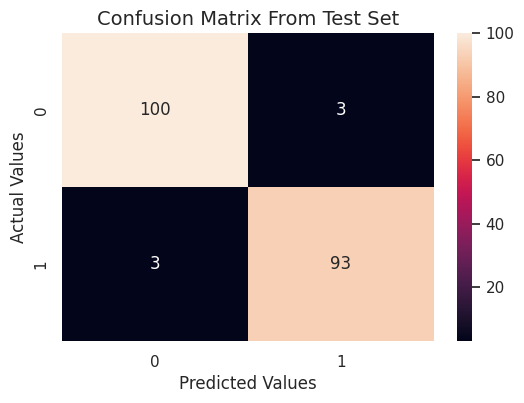

In [ ]:
# confusion matrix : hyperparameter tuning
cfm(y_test2, y_pred)

### Gradient Boosting

In [ ]:
# default parameter
grad2 = GradientBoostingClassifier(random_state = 42)
grad2.fit(x_train2, y_train2)

y_pred_train = grad2.predict(x_train2)
y_pred = grad2.predict(x_test2)

# check model performance: default parameter
eval_classification(grad2, y_pred_train, y_pred, y_train2, y_test2)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Recall (Test Set): 0.97
Recall (Train Set): 1.00
Precision (Test Set): 0.97
Precision (Train Set): 1.00
F1 Score (Test Set): 0.97
F1 Score (Train Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 0.97


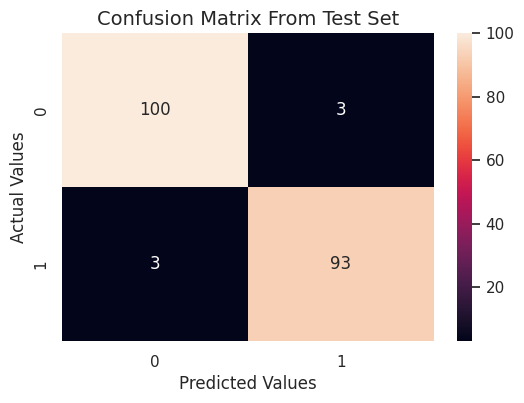

In [ ]:
# confusion matrix : default parameter
cfm(y_test2, y_pred)

In [ ]:
# List of hyperparameters
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(10, 50, num = 10)],
                       criterion = ['friedman_mse', 'squared_error'],
                       max_depth = [2, 3],
                       min_samples_split = [1, 2, 3],
                       min_samples_leaf = [1, 2, 3],
                       max_features = ['sqrt'],
                       loss = ['exponential'])

grad = GradientBoostingClassifier(random_state = 42)
grad2_tuned = GridSearchCV(grad, hyperparameters, cv = 5, scoring = 'accuracy')
grad2_tuned.fit(x_train2, y_train2)

y_pred_train = grad2_tuned.predict(x_train2)
y_pred = grad2_tuned.predict(x_test2)

# check model performance: default parameter
eval_classification(grad2_tuned, y_pred_train, y_pred, y_train2, y_test2)

Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.98
Recall (Test Set): 0.96
Recall (Train Set): 0.97
Precision (Test Set): 0.95
Precision (Train Set): 0.99
F1 Score (Test Set): 0.95
F1 Score (Train Set): 0.98
AUC (Train Set): 0.98
AUC (Test Set): 0.95


In [ ]:
show_best_hyperparameter(grad2_tuned)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 41, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [ ]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
grad2_tuned = GradientBoostingClassifier(n_estimators = 41,
                                   criterion = 'friedman_mse',
                                   max_depth = 3,
                                   min_samples_split = 2,
                                   min_samples_leaf = 2,
                                   max_features = 'sqrt',
                                   loss = 'exponential').fit(x_train2, y_train2)

eval_classification(grad2_tuned, y_pred_train, y_pred, y_train2, y_test2)

Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.98
Recall (Test Set): 0.96
Recall (Train Set): 0.97
Precision (Test Set): 0.95
Precision (Train Set): 0.99
F1 Score (Test Set): 0.95
F1 Score (Train Set): 0.98
AUC (Train Set): 0.98
AUC (Test Set): 0.95


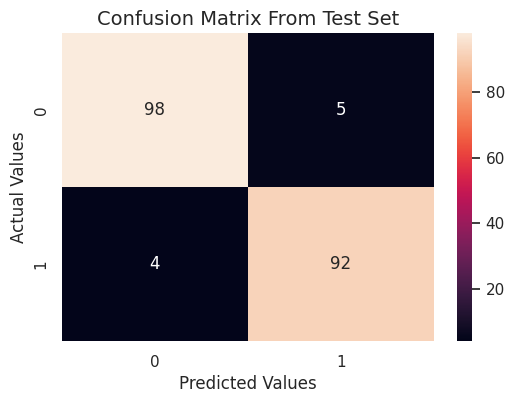

In [ ]:
# confusion matrix : default parameter
cfm(y_test2, y_pred)

## Result Experiment 1

In [ ]:
# define model
models_dict = {}
models_dict["Logistic Regression"] = lr_tuned1
models_dict["KNearest Neighbors"] = knn1_tuned
models_dict["Decision Tree"] = dt1_tuned
models_dict["Random Forest"] = rf1_tuned
models_dict["Gradient Boosting"] = grad1_tuned

In [ ]:
for model_name, model in models_dict.items():
    print(f"Training model {model_name}")
    %time model.fit(x_train1,y_train1)

Training model Logistic Regression
CPU times: user 40 ms, sys: 30 ms, total: 70 ms
Wall time: 49.8 ms
Training model KNearest Neighbors
CPU times: user 4.44 ms, sys: 967 µs, total: 5.41 ms
Wall time: 5.78 ms
Training model Decision Tree
CPU times: user 9.58 ms, sys: 5.05 ms, total: 14.6 ms
Wall time: 14.9 ms
Training model Random Forest
CPU times: user 311 ms, sys: 91.1 ms, total: 402 ms
Wall time: 294 ms
Training model Gradient Boosting
CPU times: user 55.5 ms, sys: 0 ns, total: 55.5 ms
Wall time: 55.7 ms


In [ ]:
# create list to store prediciton results
import time
train_prediction_results = []
test_prediction_results = []

train_val_time_elapsed = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model on {model_name}")
    # predict
    model_pred_test = model.predict(x_test1)
    test_prediction_results.append(model_pred_test)

    # append result to list
    model_pred_train = model.predict(x_train1)
    train_prediction_results.append(model_pred_train)

    tfinish = time.time()
    time_elapsed = round((tfinish - tstart)*1000, 2)
    train_val_time_elapsed.append(time_elapsed)
    print(f"elapsed time: {time_elapsed} ms")

Model on Logistic Regression
elapsed time: 7.05 ms
Model on KNearest Neighbors
elapsed time: 84.84 ms
Model on Decision Tree
elapsed time: 4.38 ms
Model on Random Forest
elapsed time: 73.31 ms
Model on Gradient Boosting
elapsed time: 7.4 ms


In [ ]:
# create list to append evaluation metrics train
precision_train = []
recall_train = []
accuracy_train = []
confusion_m_train = []

# calculate error train
for y_pred in train_prediction_results:
    precision_train.append(precision_score(y_train1, y_pred))
    recall_train.append(recall_score(y_train1, y_pred))
    accuracy_train.append(accuracy_score(y_train1, y_pred))
    confusion_m_train.append(confusion_matrix(y_train1, y_pred))

# create list to append evaluation metrics train
precision_test = []
recall_test = []
accuracy_test = []
confusion_m_test = []

# calculate error train
for y_pred in test_prediction_results:
    precision_test.append(precision_score(y_test1, y_pred))
    recall_test.append(recall_score(y_test1, y_pred))
    accuracy_test.append(accuracy_score(y_test1, y_pred))
    confusion_m_test.append(confusion_matrix(y_test1, y_pred))
models_name = list(models_dict.keys())

# create dataframe for model performances
eval_dict = {
    'model':models_dict.keys(),
    'Recall_test': recall_test,
    'Recall_train': recall_train,
    'Accuracy_test': accuracy_test,
    'Accuracy_train': accuracy_train,
    'Time_Elapsed': train_val_time_elapsed
}
df_results1 = pd.DataFrame(data = eval_dict)
df_results1 = df_results1.set_index("model")
df_results1.sort_values(['Recall_test', 'Recall_train', 'Accuracy_test','Accuracy_train'], ascending = False)

,Recall_test,Recall_train,Accuracy_test,Accuracy_train,Time_Elapsed
model,,,,,
Random Forest,0.968750,0.982278,0.964824,0.989899,73.31
Gradient Boosting,0.968750,0.967089,0.964824,0.978535,7.40
Decision Tree,0.947917,0.949367,0.934673,0.957071,4.38
Logistic Regression,0.895833,0.926582,0.919598,0.933081,7.05
KNearest Neighbors,0.520833,0.668354,0.653266,0.727273,84.84


Hasil performa model menggunakan dataset tanpa standardisasi adalah sebagai berikut:
- Hampir semua model memiliki hasil performa antara test dan train nya tidak memiliki gap yang besar.
- Akurasi dan recall paling tinggi dimiliki oleh model Random Forest.
- Jika ingin menggunakan time_elapsed yang lebih cepat untuk memprediksi model, maka model Gradient Boosting adalah opsi lain dibandingkan dengan model Random Forest.
- Model K-Nearest Neighbors memiliki performa yang paling buruk di antara model lainnya.

## Result Experiment 2

In [ ]:
# define model
models_dict = {}
models_dict["Logistic Regression"] = lr_tuned2
models_dict["KNearest Neighbors"] = knn2_tuned
models_dict["Decision Tree"] = dt2_tuned
models_dict["Random Forest"] = rf2_tuned
models_dict["Gradient Boosting"] = grad2_tuned

In [ ]:
for model_name, model in models_dict.items():
    print(f"Training model {model_name}")
    %time model.fit(x_train2, y_train2)

Training model Logistic Regression
CPU times: user 8.04 ms, sys: 1.07 ms, total: 9.1 ms
Wall time: 11.6 ms
Training model KNearest Neighbors
CPU times: user 3.36 ms, sys: 22 µs, total: 3.38 ms
Wall time: 3.39 ms
Training model Decision Tree
CPU times: user 3.93 ms, sys: 0 ns, total: 3.93 ms
Wall time: 3.94 ms
Training model Random Forest
CPU times: user 288 ms, sys: 24.9 ms, total: 313 ms
Wall time: 278 ms
Training model Gradient Boosting
CPU times: user 64.2 ms, sys: 0 ns, total: 64.2 ms
Wall time: 67.6 ms


In [ ]:
# create list to store prediciton results
import time
train_prediction_results = []
test_prediction_results = []

train_val_time_elapsed = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model on {model_name}")
    # predict
    model_pred_test = model.predict(x_test2)
    test_prediction_results.append(model_pred_test)

    # append result to list
    model_pred_train = model.predict(x_train2)
    train_prediction_results.append(model_pred_train)

    tfinish = time.time()
    time_elapsed = round((tfinish - tstart)*1000, 2)
    train_val_time_elapsed.append(time_elapsed)
    print(f"elapsed time: {time_elapsed} ms")

Model on Logistic Regression
elapsed time: 9.49 ms
Model on KNearest Neighbors
elapsed time: 187.72 ms
Model on Decision Tree
elapsed time: 4.9 ms
Model on Random Forest
elapsed time: 67.82 ms
Model on Gradient Boosting
elapsed time: 7.74 ms


In [ ]:
# create list to append evaluation metrics train
precision_train = []
recall_train = []
accuracy_train = []
confusion_m_train = []

# calculate error train
for y_pred in train_prediction_results:
    precision_train.append(precision_score(y_train2, y_pred))
    recall_train.append(recall_score(y_train2, y_pred))
    accuracy_train.append(accuracy_score(y_train2, y_pred))
    confusion_m_train.append(confusion_matrix(y_train2, y_pred))

# create list to append evaluation metrics train
precision_test = []
recall_test = []
accuracy_test = []
confusion_m_test = []

# calculate error train
for y_pred in test_prediction_results:
    precision_test.append(precision_score(y_test2, y_pred))
    recall_test.append(recall_score(y_test2, y_pred))
    accuracy_test.append(accuracy_score(y_test2, y_pred))
    confusion_m_test.append(confusion_matrix(y_test2, y_pred))
models_name = list(models_dict.keys())

# create dataframe for model performances
eval_dict = {
    'model':models_dict.keys(),
    'Recall_test': recall_test,
    'Recall_train': recall_train,
    'Accuracy_test': accuracy_test,
    'Accuracy_train': accuracy_train,
    'Time_Elapsed': train_val_time_elapsed
}
df_results2 = pd.DataFrame(data = eval_dict)
df_results2 = df_results2.set_index("model")
df_results2.sort_values(['Recall_test', 'Recall_train','Accuracy_test','Accuracy_train'], ascending = False)

,Recall_test,Recall_train,Accuracy_test,Accuracy_train,Time_Elapsed
model,,,,,
Random Forest,0.968750,0.979747,0.964824,0.988636,67.82
Gradient Boosting,0.947917,0.969620,0.954774,0.978535,7.74
Logistic Regression,0.937500,0.911392,0.964824,0.953283,9.49
KNearest Neighbors,0.906250,0.924051,0.944724,0.955808,187.72
Decision Tree,0.864583,0.949367,0.899497,0.962121,4.90


Hasil performa model menggunakan dataset dengan standardisasi adalah sebagai berikut:
- Model memiliki performa yang lebih baik dibandingkan dengan model yang belum distandardisasi.
- Di antara model tersebut, Logistic Regression memiliki model yang underfit karena nilai train < nilai test pada recall dan accuracy nya.
- Model K-Nearest Neighbors memiliki performa cukup baik setelah dilakukan standardisasi.
- Model dengan nilai recall dan akurasi paling tinggi adalah model Random Forest.

**Simpulan**

Model yang dipilih adalah model Random Forest setelah distandardisasi sebab memiliki nilai recall dan akurasi paling tinggi dibanding model lainnya.

## Selected Model

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=x_test1.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(6, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

### Random Forest

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#List of hyperparameters
hyperparameters = dict(
                       n_estimators = [100, 110],
                       bootstrap = [True],
                       criterion = ['gini'],
                       max_depth = [13, 14],
                       min_samples_split = [13, 14],
                       min_samples_leaf = [1, 2],
                       max_features = ['auto','sqrt','log2'],
                       n_jobs = [-1])

rf = RandomForestClassifier(random_state = 42)
rf2_tuned = GridSearchCV(rf, hyperparameters, cv = 5, scoring = 'accuracy')
rf2_tuned.fit(x_train2, y_train2)

y_pred_train = rf2_tuned.predict(x_train2)
y_pred = rf2_tuned.predict(x_test2)

eval_classification(rf2_tuned, y_pred_train, y_pred, y_train2, y_test2)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.98
Recall (Test Set): 0.97
Recall (Train Set): 0.98
Precision (Test Set): 0.97
Precision (Train Set): 0.99
F1 Score (Test Set): 0.97
F1 Score (Train Set): 0.98
AUC (Train Set): 0.98
AUC (Test Set): 0.97


In [ ]:
show_best_hyperparameter(rf2_tuned.best_estimator_, hyperparameters)

Best n_estimators: 100
Best bootstrap: True
Best criterion: gini
Best max_depth: 13
Best min_samples_split: 14
Best min_samples_leaf: 1
Best max_features: auto
Best n_jobs: -1


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_best = RandomForestClassifier(random_state = 42,
                                 n_estimators = 100,
                                 bootstrap = True,
                                 criterion = 'gini',
                                 max_depth = 13,
                                 min_samples_split = 14,
                                 min_samples_leaf = 1,
                                 max_features = 'auto',
                                 n_jobs=-1)
rf_best.fit(x_train2, y_train2)

y_train_pred_best = rf_best.predict(x_train2)
y_pred_best = rf_best.predict(x_test2)

eval_classification(rf_best, y_train_pred_best, y_pred_best, y_train2, y_test2)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.98
Recall (Test Set): 0.97
Recall (Train Set): 0.98
Precision (Test Set): 0.97
Precision (Train Set): 0.99
F1 Score (Test Set): 0.97
F1 Score (Train Set): 0.98
AUC (Train Set): 0.98
AUC (Test Set): 0.97


#### Confusion Matrix

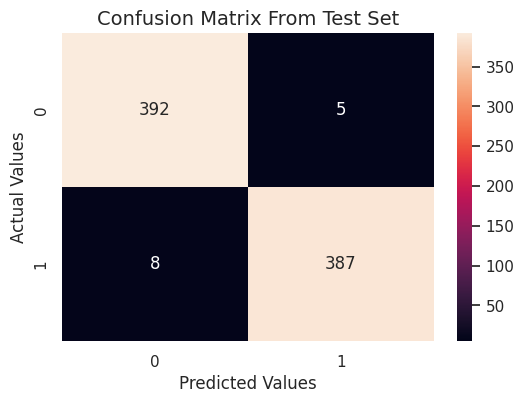

In [ ]:
cfm(y_train2, y_pred_train)

Dari 395 data aktual yang mengklik ad pada data train, terdapat 387 data diprediksi mengklik ad dan 8 data diprediksi tidak mengklik ad (seharusnya mengklik tetapi diprediksi kebalikannya). Dari 397 data aktual yang tidak mengklik ad pada data train, terdapat 392 data diprediksi tidak mengklik ad dan 5 data diprediksi mengklik ad (seharusnya tidak mengklik tetapi diprediksi kebalikannya). Akibatnya, performa model sudah sangat bagus karena mengurangi nilai kesalahan pada prediksi di data aktualnya.

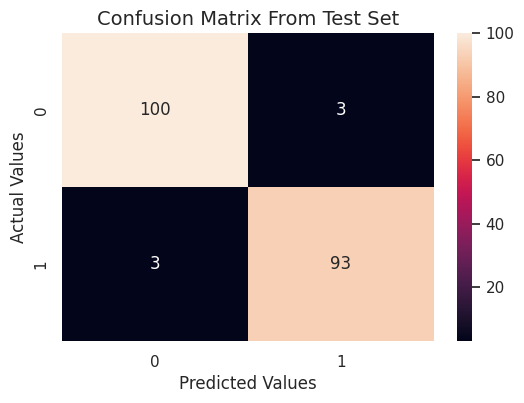

In [ ]:
cfm(y_test2, y_pred)

Dari 96 data aktual yang mengklik ad pada data test, terdapat 93 data diprediksi mengklik ad dan 3 data diprediksi tidak mengklik ad (seharusnya mengklik tetapi diprediksi kebalikannya). Dari 103 data aktual yang tidak mengklik ad pada data test, terdapat 100 data diprediksi tidak mengklik ad dan 3 data diprediksi mengklik ad (seharusnya tidak mengklik tetapi diprediksi kebalikannya). Akibatnya, performa model sudah sangat bagus karena mengurangi nilai kesalahan pada prediksi di data aktualnya.

**Simpulan**

Dari confusion matrix data train dan dan data test, model Random Forest sudah sangat bagus untuk diterapkan dalam dataset yang ada.

#### Feature Importance

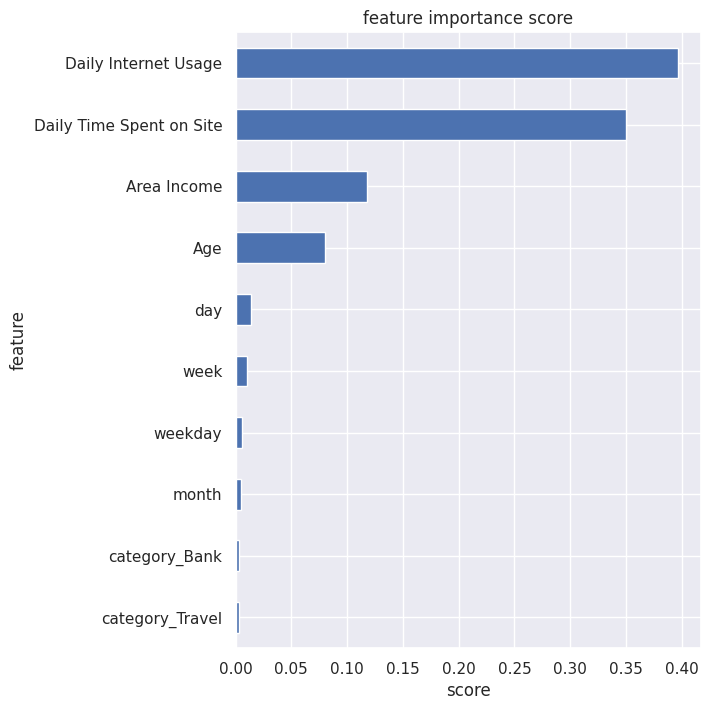

In [ ]:
show_feature_importance(rf2_tuned)

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.3 MB/s eta 0:00:00


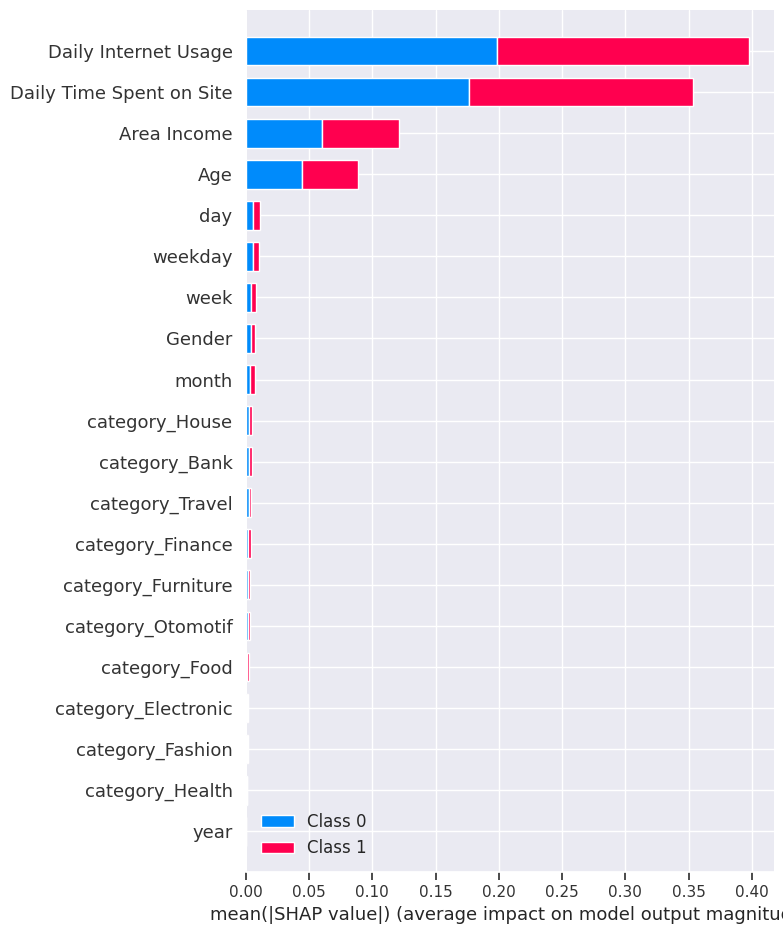

In [ ]:
import shap
shap_values = shap.TreeExplainer(model = rf_best).shap_values(x_train2)
shap.summary_plot(shap_values, x_train2, plot_type = "bar")

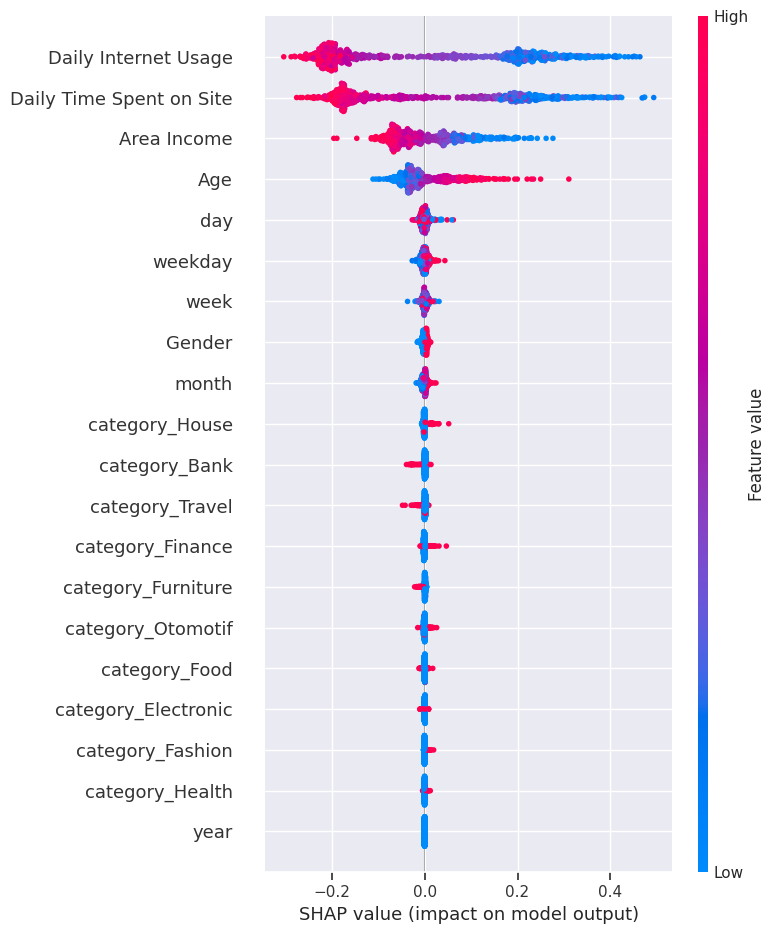

In [ ]:
shap.summary_plot(shap_values[1], x_train2)

Feature importance yang berpengaruh dalam banyak tidaknya user mengklik suatu iklan adalah Daily Internet Usage dan Daily Time Spent on Site.
- Semakin rendah Daily Internet Usage, maka semakin banyak user mengklik iklan, sedangkan semakin tinggi Daily Internet Usage, maka semakin sedikit user mengklik iklan.
- Begitu pun dengan Daily Time Spent on Site. Semakin rendah Daily Time Spent on Site, maka semakin banyak user mengklik iklan, sedangkan semakin tinggi Daily Time Spent on Site, maka semakin sedikit user mengklik iklan.

# Business Recommendation

## Feature Immportance

Berdasarkan feature importance dan hasil EDA, ada beberapa hal yang harus direkomendasikan untuk meningkatkan ketertarikan customer dalam melihat iklan:
- Dalam mengiklankan produk di suatu website, company harus memerhatikan behavior customer selama mereka menghabiskan waktu di website tersebut. Misal, customer sangat menyukai hal-hal tentang olahraga maka produk yang diiklankan adalah produk tentang olahraga juga.
- Customer yang berumur 20-40 tahun cenderung tidak suka melihat iklan produk di suatu website, padahal mereka cenderung menghabiskan waktu yang lebih lama di website tersebut. Sarannya: karena mereka cenderung merupakan generasi muda, generasi yang cenderung mudah bosan jika iklan terlalu banyak ditampilkan, maka sebaiknya iklan ditampilkan di saat mereka memiliki repetition pencarian produk dalam 2-3 hari berturut-turut dan lama pencarian produk yang melebihi rata-rata durasi waktu yang dihabiskan oleh customer lain pada umumnya.
- Penampilan iklan di website tidak disarankan terlalu sering untuk customer yang memiliki income di bawah 400 juta. Hal ini disebabkan customer yang memiliki nominal income tersebut cenderung tidak mengklik iklan walaupun durasi yang dihabiskan dan penggunaan internet pada website tersebut tinggi.



## Business Simulation

Misalkan jumlah user yang digunakan adalah 1000 user dengan masing-masing user yang mengklik iklan dan user yang tidak mengklik iklan adalah sama, yaitu 500 user.

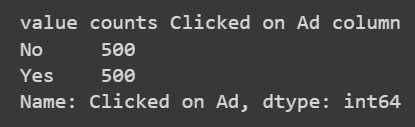

Asumsi awal:
- Budget yang dikeluarkan per user adalah Rp500,00
- Keuntungan yang diperoleh per user dalam setiap klik satu kali iklan adalah Rp2.000,00

### Sebelum Penggunaan Machine Learning

- Perhitungan cost:

  cost = budget * n_user, sehingga:

  cost = Rp500,00 * 1000 = Rp500.000,00

  sedangkan,
- Conversion rate = 50%, karena dari 1000 user ada 500 user yang mengklik iklan
- Revenue = Rp2.000,00 * 500 = Rp1.000.000,00
- Profit = Rp1.000.000,00 - Rp500.000,00 = Rp500.000,00

### Setelah Penggunaan Machine Learning

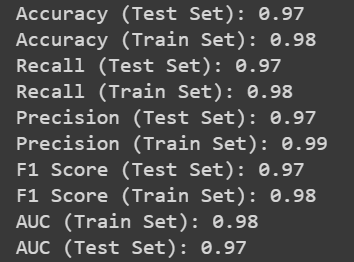

Conversion rate pada model Random Forest adalah sebesar 97%, artinya dari 1000 user terdapat 970 user yang mengklik iklan

Sehingga,

cost yang dikeluarkan tetap sama, yaitu Rp500.000,00. Akan tetapi:
- Revenue = Rp2.000,00 * 970 = Rp1.940.000,00
- Profit = Rp1.940.000,00 - Rp500.000 = Rp1.440.000,00

## Simpulan

Dari simulasi di atas, jika kita tidak menggunakan machine learning, profit yang diperoleh sebesar Rp500.000,00, sedangkan jika kita telah menggunakan machine learning, profit yang diperoleh akan meningkat hampir 3 kali lipat dari profit yang diperoleh sebelumnya.

Sehingga kita bisa simpulkan bahwa **machine learning dapat bekerja dengan baik dalam meningkatkan profit suatu perusahaan**.